In [1]:
%matplotlib inline
import glob
import os
import pandas as pd
import json
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import seaborn as sns
warnings.simplefilter('ignore')

In [64]:
df = pd.read_pickle('poi_tw_pgh.pkl')

Text(0.5,0,'# tweets per user')

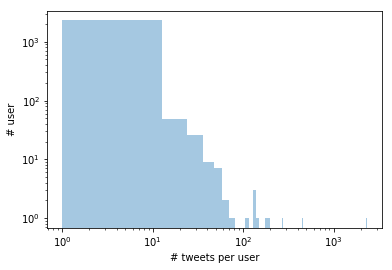

In [282]:
group = df.groupby(['user']).count()
f,ax = plt.subplots()
sns.distplot(group.poi_id,kde=False, hist_kws={'histtype':'stepfilled'}, ax=ax, bins=200)
ax.set(xscale="log", yscale="log")
ax.set_ylabel('# user')
ax.set_xlabel('# tweets per user')

Text(0.5,0,'# tweets per POI')

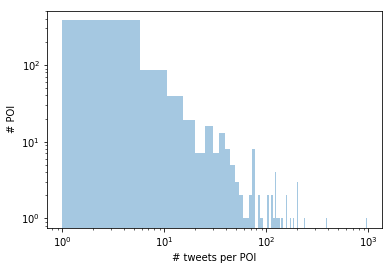

In [283]:
group = df.groupby(['poi_id']).count()
f,ax = plt.subplots()
sns.distplot(group.hour,kde=False, hist_kws={'histtype':'stepfilled'}, ax=ax, bins=200)
ax.set(xscale="log", yscale="log")
ax.set_ylabel('# POI')
ax.set_xlabel('# tweets per POI')

Text(0.5,0,'Weeks')

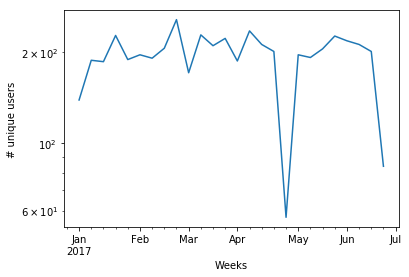

In [270]:
group = df.groupby(pd.Grouper(freq='W'))['user'].nunique()
f,ax = plt.subplots()
group.plot()
ax.set(yscale="log")
ax.set_ylabel('# unique users')
ax.set_xlabel('Weeks')

Text(0.5,1,'teste')

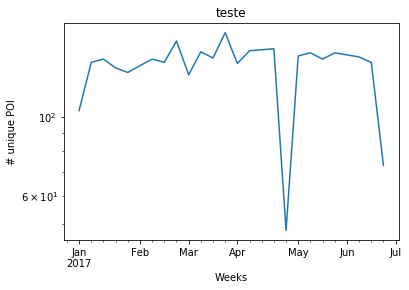

In [269]:
group = df.groupby(pd.Grouper(freq='W'))['poi_id'].unique()
f,ax = plt.subplots()
group.apply(lambda x: len(x)).plot()
ax.set_ylabel('# unique POI')
ax.set(yscale="log")
ax.set_xlabel('Weeks')
plt.title('teste')

Text(0.5,1,'teste')

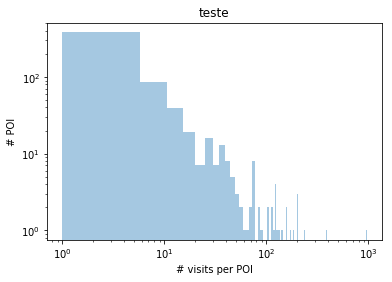

In [280]:
group = df.groupby(['poi_id']).agg({"user": lambda x: x.count()})
f,ax = plt.subplots()
sns.distplot(group,kde=False, hist_kws={'histtype':'stepfilled'}, ax=ax, bins=200)
ax.set(xscale="log")
ax.set(yscale="log")
ax.set_xlabel('# visits per POI')
ax.set_ylabel('# POI')
plt.title('teste')

Text(0.5,1,'teste')

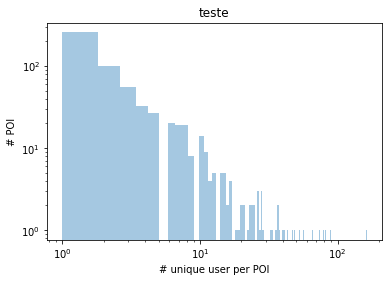

In [281]:
group = df.groupby(['poi_id']).agg({"user": lambda x: x.nunique()})
f,ax = plt.subplots()
sns.distplot(group,kde=False, hist_kws={'histtype':'stepfilled'}, ax=ax, bins=200)
ax.set(xscale="log")
ax.set(yscale="log")
ax.set_ylabel('# POI')
ax.set_xlabel('# unique user per POI')
plt.title('teste')

Text(0.5,1,'teste')

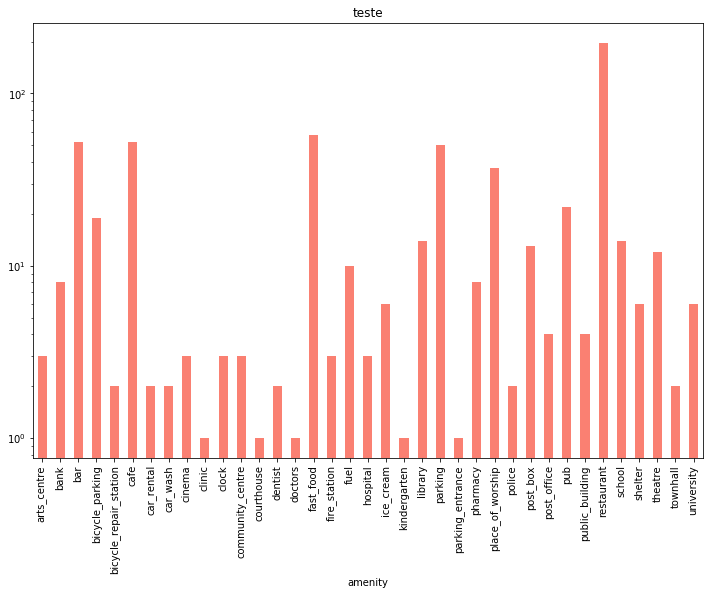

In [273]:
group = df.groupby(['amenity']).agg({"poi_id": lambda x: x.nunique()})
plt.figure(figsize=(12,8))
group.poi_id.plot.bar(color='salmon')
plt.xticks(np.arange(group.shape[0]),group.index,rotation='90')
plt.yscale('log')
plt.title('teste')